In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import bifacial_radiance
import bifacialvf
print(bifacialvf.__version__)
print(bifacial_radiance.__version__)

0.1.7-dev1+73.gf25ac0f.dirty
0.4.1+121.g952f921.dirty


In [14]:
import matplotlib.pyplot as plt

In [2]:
testfolder = r'TEMP\RADIANCE'
if not os.path.exists(testfolder):
    os.makedirs(testfolder)


In [3]:
# LOOP
pitchs = [2, 3, 5] 
timeslist = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
CHs = [1.0] #, 0.3, 0.5, 0.75]
albs = [0.22, 0.8]
locs = [722740, 727930 ]
locsnames = ['Tucson', 'Seattle']
startdate = ['03_21', '06_21', '12_21']

In [4]:
idx = '03_21'
timex = 7
ii = 'Tucson'
jj = 0.22
zz = 1.0
ww = 2
writ = 'irr_1axis_2021-'+idx.replace('_','-')+'_'+f'{timex:02}'+'00NS_'+ii+'_Alb_'+str(jj)+'_CH_'+str(zz)+'_rtr_'+str(ww)+'.csv_Row10_Module10.csv'
writ

'irr_1axis_2021-03-21_0700NS_Tucson_Alb_0.22_CH_1.0_rtr_2.csv_Row10_Module10.csv'

In [5]:
pwd

'C:\\Users\\sayala\\Documents\\GitHub\\Studies\\SouthPole\\Journals'

In [6]:
idxall = []
timeall = []
direction = []
locationall = []
albedoall = []
CHall = []
rtrall = []
rearirrad = []
rearirradavg = []

for idx in startdate:
    for timex in timeslist:
        for ii in locsnames:
            for jj in albs:
                for zz in CHs:
                    for ww in pitchs:

                            writ = r'results\irr_1axis_2021-'+idx.replace('_','-')+'_'+f'{timex:02}'+'00NS_'+ii+'_Alb_'+str(jj)+'_CH_'+str(zz)+'_rtr_'+str(ww)+'.csv_Row10_Module10.csv'
                            writ2 = r'results\irr_1axis_2021-'+idx.replace('_','-')+'_'+f'{timex:02}'+'00EW_'+ii+'_Alb_'+str(jj)+'_CH_'+str(zz)+'_rtr_'+str(ww)+'.csv_Row10_Module10.csv'

                            writefiletitle = os.path.join(testfolder,writ)
                            writefiletitle2 = os.path.join(testfolder,writ2)

                            #irr_1axis_2021-03-21_0700EW_Seattle_Alb_0.8_CH_0.3_rtr_2.csv_Row10_Module10.csv
                            try:
                                df = pd.read_csv(writefiletitle)
                                idxall.append(idx)
                                timeall.append(timex)
                                direction.append('NS')
                                locationall.append(ii)
                                albedoall.append(jj)
                                CHall.append(zz)
                                rtrall.append(ww)
                                rearirrad.append(df['Wm2Back'])
                                rearirradavg.append(df['Wm2Back'].mean())

                                df = pd.read_csv(writefiletitle2)
                                idxall.append(idx)
                                timeall.append(timex)
                                direction.append('EW')
                                locationall.append(ii)
                                albedoall.append(jj)
                                CHall.append(zz)
                                rtrall.append(ww)
                                rearirrad.append(df['Wm2Back'])
                                rearirradavg.append(df['Wm2Back'].mean())

                                
                            except:
                                print("Failed ", writefiletitle)



Failed  TEMP\RADIANCE\results\irr_1axis_2021-03-21_0700NS_Tucson_Alb_0.22_CH_1.0_rtr_2.csv_Row10_Module10.csv
Failed  TEMP\RADIANCE\results\irr_1axis_2021-03-21_0700NS_Tucson_Alb_0.22_CH_1.0_rtr_3.csv_Row10_Module10.csv
Failed  TEMP\RADIANCE\results\irr_1axis_2021-03-21_0700NS_Tucson_Alb_0.22_CH_1.0_rtr_5.csv_Row10_Module10.csv
Failed  TEMP\RADIANCE\results\irr_1axis_2021-03-21_0700NS_Tucson_Alb_0.8_CH_1.0_rtr_2.csv_Row10_Module10.csv
Failed  TEMP\RADIANCE\results\irr_1axis_2021-03-21_0700NS_Tucson_Alb_0.8_CH_1.0_rtr_3.csv_Row10_Module10.csv
Failed  TEMP\RADIANCE\results\irr_1axis_2021-03-21_0700NS_Tucson_Alb_0.8_CH_1.0_rtr_5.csv_Row10_Module10.csv
Failed  TEMP\RADIANCE\results\irr_1axis_2021-06-21_0700NS_Tucson_Alb_0.8_CH_1.0_rtr_2.csv_Row10_Module10.csv
Failed  TEMP\RADIANCE\results\irr_1axis_2021-06-21_0700NS_Tucson_Alb_0.8_CH_1.0_rtr_3.csv_Row10_Module10.csv
Failed  TEMP\RADIANCE\results\irr_1axis_2021-06-21_0700NS_Tucson_Alb_0.8_CH_1.0_rtr_5.csv_Row10_Module10.csv
Failed  TEMP\RAD

In [ ]:
# LOOP
pitchs = [2, 3, 5]   -->   []   [1.0, 1.5, 2.5]
timeslist = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
CHs = [1.0] #, 0.3, 0.5, 0.75]
albs = [0.22, 0.8]
locs = [722740, 727930 ]
locsnames = ['Tucson', 'Seattle']
startdate = ['03_21', '06_21', '12_21']

          BIFACIAL RADIANCE   VF
pitch  |   5                |    2.5
CH     |   1.0              |   0.01
albs   |   0.22, 0.8             |    0.22, 0.8
locs   |   Tucson, Seattle   | Tucson, Seattle

In [7]:
df = pd.DataFrame({'Hour': timeall, 'Month_Year': idxall, 'direction': direction, 'loc': locationall, 'Alb': albedoall, 
              'CH': CHall, 
              'pitch': rtrall, 
              'Rearirrad': rearirrad,
                           'RearirradAVG': rearirradavg})
df['Year'] = 2021
df['Day'] = 21
df['Month'] = df.apply(lambda x: x["Month_Year"][1:2], axis=1)
df['Month'] = df['Month'].astype(int)

df['datetime'] = pd.to_datetime(df[['Year','Month','Day','Hour']]) #, df['Hour'])
df.set_index('datetime', inplace=True)
df = df.tz_localize(-7*60*60)

# EW_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv

In [55]:
file = r'C:\Users\sayala\Documents\GitHub\Studies\SouthPole\Journals\TEMP\ViewFactor\EW_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv'
(dataVF, metadata) = bifacialvf.loadVFresults(file)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1976', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1977', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1978', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1979', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1980', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1981', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1982', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1983', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1984', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1985', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1986', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1987', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1988', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1989', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1990', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1991', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1992', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1993', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1994', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1995', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1996', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1997', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2000', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2001', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2002', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2003', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2004', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2005', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2006', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2007', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2008', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2009', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2010', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2011', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2012', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2013', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2014', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2015', '2021'), axis=1)
dataVF.set_index('date', inplace=True)
dataVF.index = pd.to_datetime(dataVF.index)

col_Front = [col for col in dataVF.columns if col.endswith('_RowFrontGTI')]
col_Back = [col for col in dataVF.columns if col.endswith('_RowBackGTI')]

dataVF['GTIFrontavg'] = dataVF[col_Front].mean(axis=1)
dataVF['GTIBackavg'] = dataVF[col_Back].mean(axis=1)
dataVF['POA'] = (dataVF[col_Front] + dataVF[col_Back].values).mean(axis=1)
POAN= (dataVF[col_Front] + dataVF[col_Back].values)
dataVF['nonuniformity'] = (POAN.max()-POAN.min())/(0.5*POAN.max()+POAN.min())


In [57]:
foo =  df[(df['direction']=='EW') & (df['loc'] == 'Tucson') & (df['Alb'] == 0.22) & (df['CH'] == 1.0) & (df['pitch'] == 5)]
#file = r'EW_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv'


In [59]:
results = pd.concat([foo, dataVF], axis=1, join="inner")


Text(0, 0.5, 'Irradiance [W/m2]')

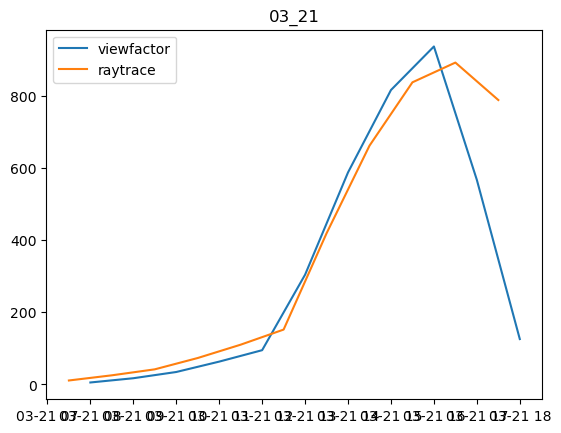

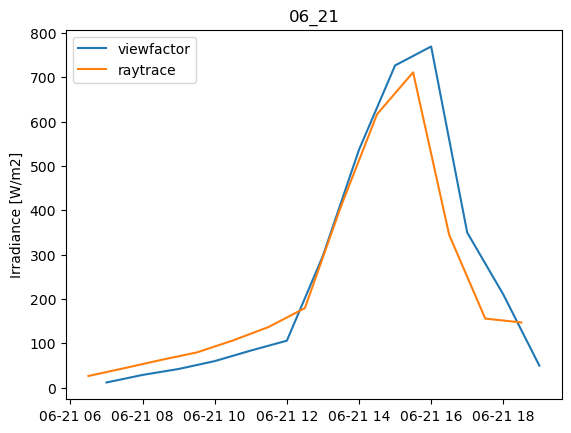

In [80]:
xyz = results[results.index <= '2021-03-22']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
#plt.plot(xyz['GTIFrontavg'], label='viewfactor Front')
plt.plot(xyz.index-pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('03_21')
plt.figure()
xyz = results[results.index >= '2021-06-20']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
plt.plot(xyz.index-pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('06_21')
plt.ylabel('Irradiance [W/m2]')

# NS_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv

In [81]:
file = r'C:\Users\sayala\Documents\GitHub\Studies\SouthPole\Journals\TEMP\ViewFactor\NS_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv'
(dataVF, metadata) = bifacialvf.loadVFresults(file)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1976', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1977', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1978', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1979', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1980', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1981', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1982', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1983', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1984', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1985', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1986', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1987', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1988', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1989', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1990', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1991', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1992', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1993', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1994', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1995', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1996', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1997', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2000', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2001', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2002', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2003', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2004', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2005', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2006', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2007', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2008', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2009', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2010', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2011', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2012', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2013', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2014', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2015', '2021'), axis=1)
dataVF.set_index('date', inplace=True)
dataVF.index = pd.to_datetime(dataVF.index)

col_Front = [col for col in dataVF.columns if col.endswith('_RowFrontGTI')]
col_Back = [col for col in dataVF.columns if col.endswith('_RowBackGTI')]

dataVF['GTIFrontavg'] = dataVF[col_Front].mean(axis=1)
dataVF['GTIBackavg'] = dataVF[col_Back].mean(axis=1)
dataVF['POA'] = (dataVF[col_Front] + dataVF[col_Back].values).mean(axis=1)
POAN= (dataVF[col_Front] + dataVF[col_Back].values)
dataVF['nonuniformity'] = (POAN.max()-POAN.min())/(0.5*POAN.max()+POAN.min())


In [82]:
foo =  df[(df['direction']=='NS') & (df['loc'] == 'Tucson') & (df['Alb'] == 0.22) & (df['CH'] == 1.0) & (df['pitch'] == 5)]
#file = r'EW_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv'


In [83]:
results = pd.concat([foo, dataVF], axis=1, join="inner")


Text(0, 0.5, 'Irradiance [W/m2]')

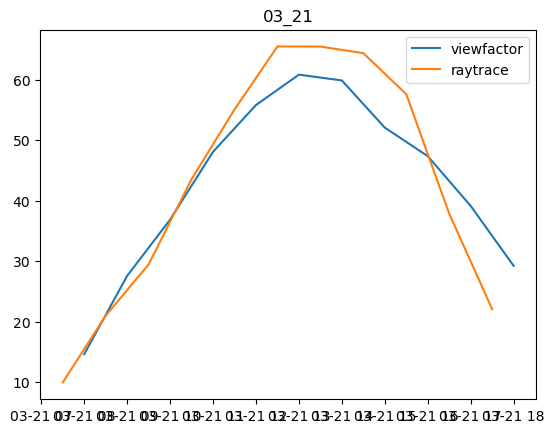

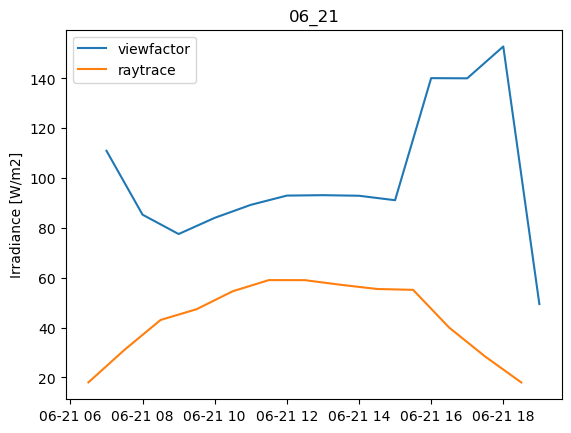

In [84]:
xyz = results[results.index <= '2021-03-22']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
#plt.plot(xyz['GTIFrontavg'], label='viewfactor Front')
plt.plot(xyz.index-pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('03_21')
plt.figure()
xyz = results[results.index >= '2021-06-20']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
plt.plot(xyz.index-pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('06_21')
plt.ylabel('Irradiance [W/m2]')

In [ ]:
# EW_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv

file = r'C:\Users\sayala\Documents\GitHub\Studies\SouthPole\Journals\TEMP\ViewFactor\EW_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv'
(dataVF, metadata) = bifacialvf.loadVFresults(file)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1976', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1977', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1978', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1979', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1980', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1981', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1982', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1983', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1984', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1985', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1986', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1987', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1988', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1989', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1990', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1991', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1992', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1993', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1994', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1995', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1996', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1997', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2000', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2001', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2002', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2003', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2004', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2005', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2006', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2007', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2008', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2009', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2010', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2011', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2012', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2013', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2014', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2015', '2021'), axis=1)
dataVF.set_index('date', inplace=True)
dataVF.index = pd.to_datetime(dataVF.index)

col_Front = [col for col in dataVF.columns if col.endswith('_RowFrontGTI')]
col_Back = [col for col in dataVF.columns if col.endswith('_RowBackGTI')]

dataVF['GTIFrontavg'] = dataVF[col_Front].mean(axis=1)
dataVF['GTIBackavg'] = dataVF[col_Back].mean(axis=1)
dataVF['POA'] = (dataVF[col_Front] + dataVF[col_Back].values).mean(axis=1)
POAN= (dataVF[col_Front] + dataVF[col_Back].values)
dataVF['nonuniformity'] = (POAN.max()-POAN.min())/(0.5*POAN.max()+POAN.min())


foo =  df[(df['direction']=='EW') & (df['loc'] == 'Tucson') & (df['Alb'] == 0.22) & (df['CH'] == 1.0) & (df['pitch'] == 5)]
#file = r'EW_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv'


results = pd.concat([foo, dataVF], axis=1, join="inner")


xyz = results[results.index <= '2021-03-22']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
#plt.plot(xyz['GTIFrontavg'], label='viewfactor Front')
plt.plot(xyz.index-pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('03_21')
plt.figure()
xyz = results[results.index >= '2021-06-20']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
plt.plot(xyz.index-pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('06_21')
plt.ylabel('Irradiance [W/m2]')

# NS_Tucson_Alb_0.8_CH_0.01_rtr_2.5.csv

In [85]:
file = r'C:\Users\sayala\Documents\GitHub\Studies\SouthPole\Journals\TEMP\ViewFactor\NS_Tucson_Alb_0.8_CH_0.01_rtr_2.5.csv'
(dataVF, metadata) = bifacialvf.loadVFresults(file)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1976', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1977', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1978', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1979', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1980', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1981', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1982', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1983', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1984', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1985', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1986', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1987', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1988', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1989', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1990', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1991', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1992', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1993', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1994', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1995', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1996', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1997', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2000', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2001', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2002', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2003', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2004', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2005', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2006', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2007', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2008', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2009', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2010', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2011', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2012', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2013', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2014', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2015', '2021'), axis=1)
dataVF.set_index('date', inplace=True)
dataVF.index = pd.to_datetime(dataVF.index)

col_Front = [col for col in dataVF.columns if col.endswith('_RowFrontGTI')]
col_Back = [col for col in dataVF.columns if col.endswith('_RowBackGTI')]

dataVF['GTIFrontavg'] = dataVF[col_Front].mean(axis=1)
dataVF['GTIBackavg'] = dataVF[col_Back].mean(axis=1)
dataVF['POA'] = (dataVF[col_Front] + dataVF[col_Back].values).mean(axis=1)
POAN= (dataVF[col_Front] + dataVF[col_Back].values)
dataVF['nonuniformity'] = (POAN.max()-POAN.min())/(0.5*POAN.max()+POAN.min())


In [86]:
foo =  df[(df['direction']=='NS') & (df['loc'] == 'Tucson') & (df['Alb'] == 0.8) & (df['CH'] == 1.0) & (df['pitch'] == 5)]
#file = r'EW_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv'


In [87]:
results = pd.concat([foo, dataVF], axis=1, join="inner")


Text(0, 0.5, 'Irradiance [W/m2]')

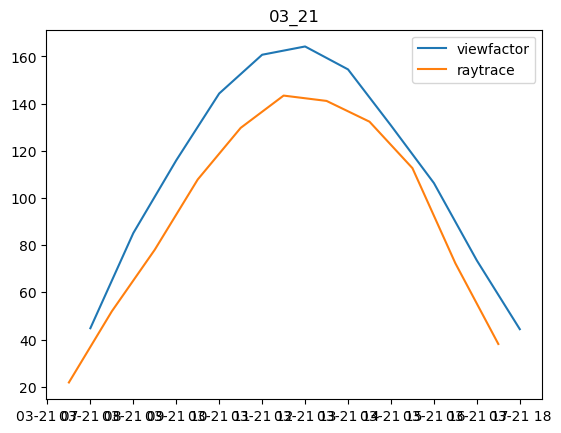

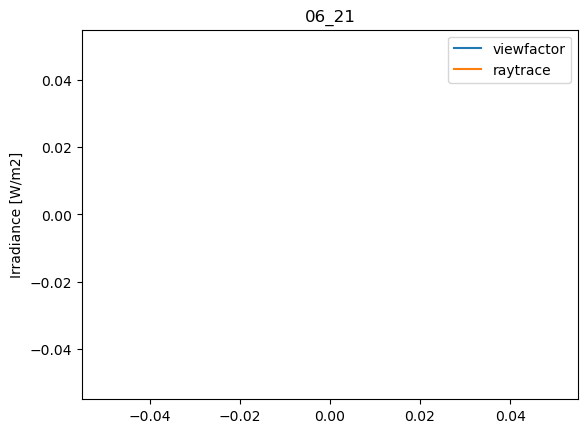

In [88]:
xyz = results[results.index <= '2021-03-22']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
#plt.plot(xyz['GTIFrontavg'], label='viewfactor Front')
plt.plot(xyz.index-pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('03_21')
plt.figure()
xyz = results[results.index >= '2021-06-20']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
plt.plot(xyz.index-pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('06_21')
plt.ylabel('Irradiance [W/m2]')

In [ ]:
# EW_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv

file = r'C:\Users\sayala\Documents\GitHub\Studies\SouthPole\Journals\TEMP\ViewFactor\EW_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv'
(dataVF, metadata) = bifacialvf.loadVFresults(file)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1976', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1977', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1978', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1979', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1980', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1981', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1982', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1983', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1984', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1985', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1986', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1987', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1988', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1989', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1990', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1991', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1992', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1993', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1994', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1995', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1996', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1997', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2000', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2001', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2002', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2003', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2004', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2005', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2006', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2007', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2008', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2009', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2010', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2011', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2012', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2013', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2014', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2015', '2021'), axis=1)
dataVF.set_index('date', inplace=True)
dataVF.index = pd.to_datetime(dataVF.index)

col_Front = [col for col in dataVF.columns if col.endswith('_RowFrontGTI')]
col_Back = [col for col in dataVF.columns if col.endswith('_RowBackGTI')]

dataVF['GTIFrontavg'] = dataVF[col_Front].mean(axis=1)
dataVF['GTIBackavg'] = dataVF[col_Back].mean(axis=1)
dataVF['POA'] = (dataVF[col_Front] + dataVF[col_Back].values).mean(axis=1)
POAN= (dataVF[col_Front] + dataVF[col_Back].values)
dataVF['nonuniformity'] = (POAN.max()-POAN.min())/(0.5*POAN.max()+POAN.min())


foo =  df[(df['direction']=='EW') & (df['loc'] == 'Tucson') & (df['Alb'] == 0.22) & (df['CH'] == 1.0) & (df['pitch'] == 5)]
#file = r'EW_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv'


results = pd.concat([foo, dataVF], axis=1, join="inner")


xyz = results[results.index <= '2021-03-22']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
#plt.plot(xyz['GTIFrontavg'], label='viewfactor Front')
plt.plot(xyz.index-pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('03_21')
plt.figure()
xyz = results[results.index >= '2021-06-20']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
plt.plot(xyz.index-pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('06_21')
plt.ylabel('Irradiance [W/m2]')

# EW_Tucson_Alb_0.8_CH_0.01_rtr_2.5.csv

In [89]:
file = r'C:\Users\sayala\Documents\GitHub\Studies\SouthPole\Journals\TEMP\ViewFactor\EW_Tucson_Alb_0.8_CH_0.01_rtr_2.5.csv'
(dataVF, metadata) = bifacialvf.loadVFresults(file)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1976', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1977', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1978', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1979', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1980', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1981', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1982', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1983', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1984', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1985', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1986', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1987', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1988', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1989', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1990', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1991', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1992', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1993', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1994', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1995', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1996', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1997', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2000', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2001', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2002', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2003', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2004', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2005', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2006', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2007', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2008', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2009', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2010', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2011', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2012', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2013', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2014', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2015', '2021'), axis=1)
dataVF.set_index('date', inplace=True)
dataVF.index = pd.to_datetime(dataVF.index)

col_Front = [col for col in dataVF.columns if col.endswith('_RowFrontGTI')]
col_Back = [col for col in dataVF.columns if col.endswith('_RowBackGTI')]

dataVF['GTIFrontavg'] = dataVF[col_Front].mean(axis=1)
dataVF['GTIBackavg'] = dataVF[col_Back].mean(axis=1)
dataVF['POA'] = (dataVF[col_Front] + dataVF[col_Back].values).mean(axis=1)
POAN= (dataVF[col_Front] + dataVF[col_Back].values)
dataVF['nonuniformity'] = (POAN.max()-POAN.min())/(0.5*POAN.max()+POAN.min())


In [90]:
foo =  df[(df['direction']=='EW') & (df['loc'] == 'Tucson') & (df['Alb'] == 0.8) & (df['CH'] == 1.0) & (df['pitch'] == 5)]
#file = r'EW_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv'


In [91]:
results = pd.concat([foo, dataVF], axis=1, join="inner")


Text(0, 0.5, 'Irradiance [W/m2]')

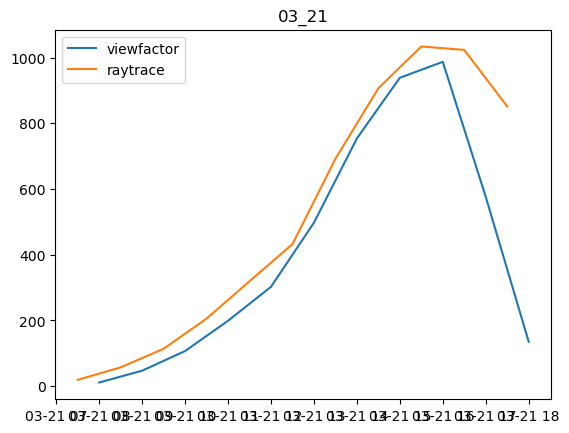

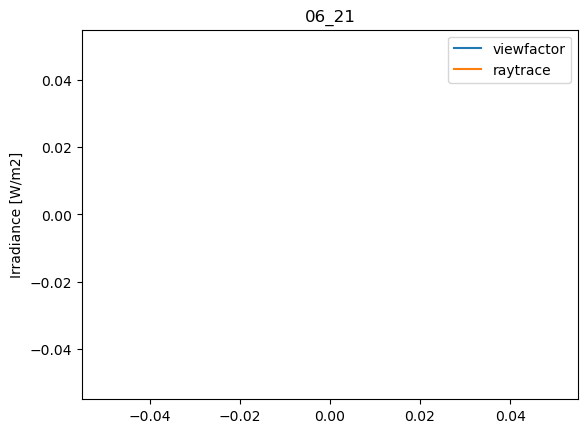

In [92]:
xyz = results[results.index <= '2021-03-22']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
#plt.plot(xyz['GTIFrontavg'], label='viewfactor Front')
plt.plot(xyz.index-pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('03_21')
plt.figure()
xyz = results[results.index >= '2021-06-20']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
plt.plot(xyz.index-pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('06_21')
plt.ylabel('Irradiance [W/m2]')

# EW_Seattle_Alb_0.22_CH_0.01_rtr_2.5.csv

In [94]:
file = r'C:\Users\sayala\Documents\GitHub\Studies\SouthPole\Journals\TEMP\ViewFactor\EW_Seattle_Alb_0.22_CH_0.01_rtr_2.5.csv'
(dataVF, metadata) = bifacialvf.loadVFresults(file)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1976', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1977', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1978', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1979', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1980', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1981', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1982', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1983', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1984', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1985', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1986', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1987', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1988', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1989', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1990', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1991', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1992', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1993', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1994', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1995', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1996', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1997', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2000', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2001', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2002', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2003', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2004', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2005', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2006', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2007', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2008', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2009', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2010', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2011', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2012', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2013', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2014', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2015', '2021'), axis=1)
dataVF.set_index('date', inplace=True)
dataVF.index = pd.to_datetime(dataVF.index)

col_Front = [col for col in dataVF.columns if col.endswith('_RowFrontGTI')]
col_Back = [col for col in dataVF.columns if col.endswith('_RowBackGTI')]

dataVF['GTIFrontavg'] = dataVF[col_Front].mean(axis=1)
dataVF['GTIBackavg'] = dataVF[col_Back].mean(axis=1)
dataVF['POA'] = (dataVF[col_Front] + dataVF[col_Back].values).mean(axis=1)
POAN= (dataVF[col_Front] + dataVF[col_Back].values)
dataVF['nonuniformity'] = (POAN.max()-POAN.min())/(0.5*POAN.max()+POAN.min())


In [111]:
df = df.tz_convert(-8*60*60)

In [118]:
foo =  df[(df['direction']=='EW') & (df['loc'] == 'Seattle') & (df['Alb'] == 0.22) & (df['CH'] == 1.0) & (df['pitch'] == 5)]
#file = r'EW_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv'


In [120]:
results = pd.concat([foo, dataVF], axis=1, join="inner")


Text(0, 0.5, 'Irradiance [W/m2]')

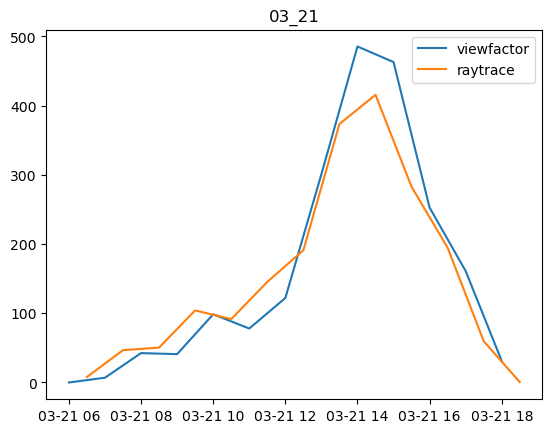

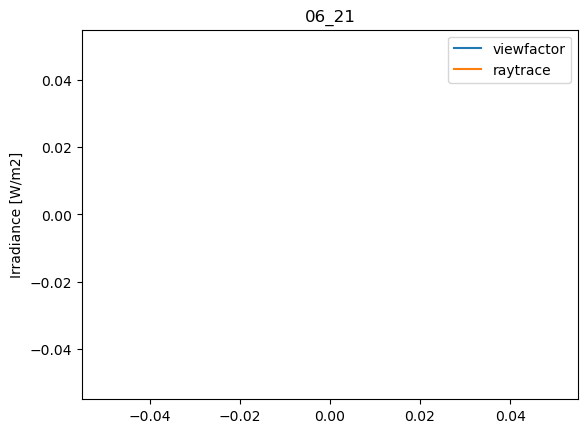

In [123]:
xyz = results[results.index <= '2021-03-22']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
#plt.plot(xyz['GTIFrontavg'], label='viewfactor Front')
plt.plot(xyz.index+pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('03_21')
plt.figure()
xyz = results[results.index >= '2021-06-20']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
plt.plot(xyz.index+pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('06_21')
plt.ylabel('Irradiance [W/m2]')

# NS_Seattle_Alb_0.22_CH_0.01_rtr_2.5.csv

In [135]:
file = r'C:\Users\sayala\Documents\GitHub\Studies\SouthPole\Journals\TEMP\ViewFactor\NS_Seattle_Alb_0.22_CH_0.01_rtr_2.5.csv'
(dataVF, metadata) = bifacialvf.loadVFresults(file)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1976', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1977', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1978', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1979', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1980', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1981', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1982', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1983', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1984', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1985', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1986', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1987', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1988', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1989', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1990', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1991', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1992', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1993', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1994', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1995', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1996', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1997', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2000', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2001', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2002', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2003', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2004', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2005', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2006', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2007', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2008', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2009', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2010', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2011', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2012', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2013', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2014', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2015', '2021'), axis=1)
dataVF.set_index('date', inplace=True)
dataVF.index = pd.to_datetime(dataVF.index)

col_Front = [col for col in dataVF.columns if col.endswith('_RowFrontGTI')]
col_Back = [col for col in dataVF.columns if col.endswith('_RowBackGTI')]

dataVF['GTIFrontavg'] = dataVF[col_Front].mean(axis=1)
dataVF['GTIBackavg'] = dataVF[col_Back].mean(axis=1)
dataVF['POA'] = (dataVF[col_Front] + dataVF[col_Back].values).mean(axis=1)
POAN= (dataVF[col_Front] + dataVF[col_Back].values)
dataVF['nonuniformity'] = (POAN.max()-POAN.min())/(0.5*POAN.max()+POAN.min())


In [136]:
df = df.tz_convert(-8*60*60)

In [137]:
foo =  df[(df['direction']=='NS') & (df['loc'] == 'Seattle') & (df['Alb'] == 0.22) & (df['CH'] == 1.0) & (df['pitch'] == 5)]
#file = r'EW_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv'


In [138]:
results = pd.concat([foo, dataVF], axis=1, join="inner")


Text(0, 0.5, 'Irradiance [W/m2]')

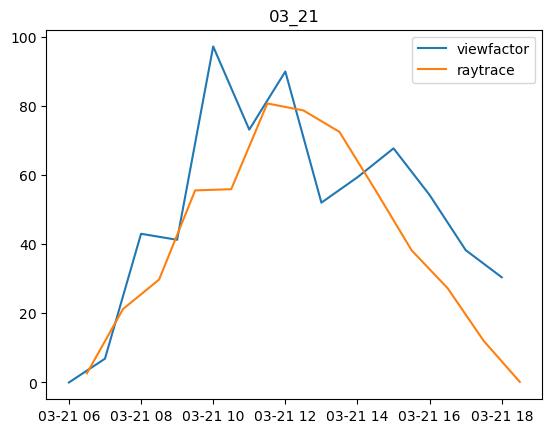

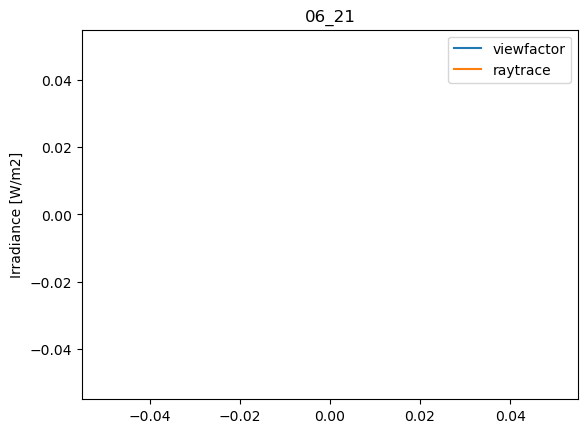

In [139]:
xyz = results[results.index <= '2021-03-22']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
#plt.plot(xyz['GTIFrontavg'], label='viewfactor Front')
plt.plot(xyz.index+pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('03_21')
plt.figure()
xyz = results[results.index >= '2021-06-20']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
plt.plot(xyz.index+pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('06_21')
plt.ylabel('Irradiance [W/m2]')

# NS_Seattle_Alb_0.8_CH_0.01_rtr_2.5.csv

In [141]:
file = r'C:\Users\sayala\Documents\GitHub\Studies\SouthPole\Journals\TEMP\ViewFactor\NS_Seattle_Alb_0.8_CH_0.01_rtr_2.5.csv'
(dataVF, metadata) = bifacialvf.loadVFresults(file)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1976', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1977', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1978', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1979', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1980', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1981', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1982', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1983', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1984', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1985', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1986', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1987', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1988', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1989', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1990', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1991', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1992', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1993', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1994', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1995', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1996', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1997', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2000', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2001', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2002', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2003', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2004', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2005', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2006', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2007', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2008', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2009', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2010', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2011', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2012', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2013', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2014', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2015', '2021'), axis=1)
dataVF.set_index('date', inplace=True)
dataVF.index = pd.to_datetime(dataVF.index)

col_Front = [col for col in dataVF.columns if col.endswith('_RowFrontGTI')]
col_Back = [col for col in dataVF.columns if col.endswith('_RowBackGTI')]

dataVF['GTIFrontavg'] = dataVF[col_Front].mean(axis=1)
dataVF['GTIBackavg'] = dataVF[col_Back].mean(axis=1)
dataVF['POA'] = (dataVF[col_Front] + dataVF[col_Back].values).mean(axis=1)
POAN= (dataVF[col_Front] + dataVF[col_Back].values)
dataVF['nonuniformity'] = (POAN.max()-POAN.min())/(0.5*POAN.max()+POAN.min())


In [142]:
df = df.tz_convert(-8*60*60)

In [143]:
foo =  df[(df['direction']=='NS') & (df['loc'] == 'Seattle') & (df['Alb'] == 0.8) & (df['CH'] == 1.0) & (df['pitch'] == 5)]
#file = r'EW_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv'


In [144]:
results = pd.concat([foo, dataVF], axis=1, join="inner")


Text(0, 0.5, 'Irradiance [W/m2]')

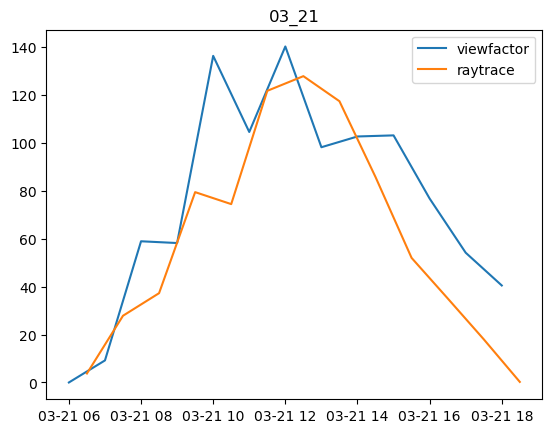

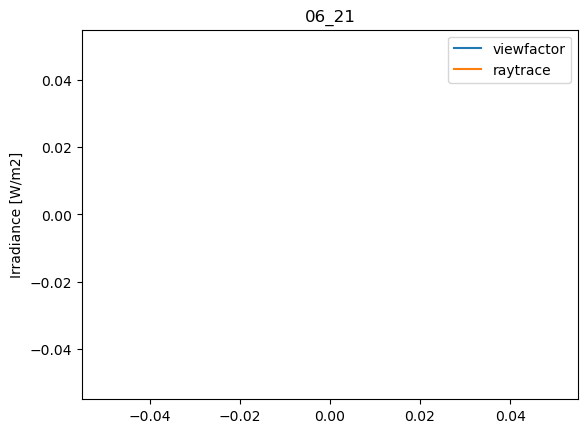

In [145]:
xyz = results[results.index <= '2021-03-22']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
#plt.plot(xyz['GTIFrontavg'], label='viewfactor Front')
plt.plot(xyz.index+pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('03_21')
plt.figure()
xyz = results[results.index >= '2021-06-20']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
plt.plot(xyz.index+pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('06_21')
plt.ylabel('Irradiance [W/m2]')

# EW_Seattle_Alb_0.8_CH_0.01_rtr_2.5.csv

In [146]:
file = r'C:\Users\sayala\Documents\GitHub\Studies\SouthPole\Journals\TEMP\ViewFactor\EW_Seattle_Alb_0.8_CH_0.01_rtr_2.5.csv'
(dataVF, metadata) = bifacialvf.loadVFresults(file)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1976', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1977', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1978', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1979', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1980', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1981', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1982', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1983', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1984', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1985', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1986', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1987', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1988', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1989', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1990', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1991', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1992', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1993', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1994', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1995', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1996', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1997', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('1999', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2000', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2001', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2002', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2003', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2004', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2005', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2006', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2007', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2008', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2009', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2010', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2011', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2012', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2013', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2014', '2021'), axis=1)
dataVF['date'] = dataVF.apply(lambda x: x['date'].replace('2015', '2021'), axis=1)
dataVF.set_index('date', inplace=True)
dataVF.index = pd.to_datetime(dataVF.index)

col_Front = [col for col in dataVF.columns if col.endswith('_RowFrontGTI')]
col_Back = [col for col in dataVF.columns if col.endswith('_RowBackGTI')]

dataVF['GTIFrontavg'] = dataVF[col_Front].mean(axis=1)
dataVF['GTIBackavg'] = dataVF[col_Back].mean(axis=1)
dataVF['POA'] = (dataVF[col_Front] + dataVF[col_Back].values).mean(axis=1)
POAN= (dataVF[col_Front] + dataVF[col_Back].values)
dataVF['nonuniformity'] = (POAN.max()-POAN.min())/(0.5*POAN.max()+POAN.min())


In [147]:
df = df.tz_convert(-8*60*60)

In [148]:
foo =  df[(df['direction']=='EW') & (df['loc'] == 'Seattle') & (df['Alb'] == 0.8) & (df['CH'] == 1.0) & (df['pitch'] == 5)]
#file = r'EW_Tucson_Alb_0.22_CH_0.01_rtr_2.5.csv'


In [149]:
results = pd.concat([foo, dataVF], axis=1, join="inner")


Text(0, 0.5, 'Irradiance [W/m2]')

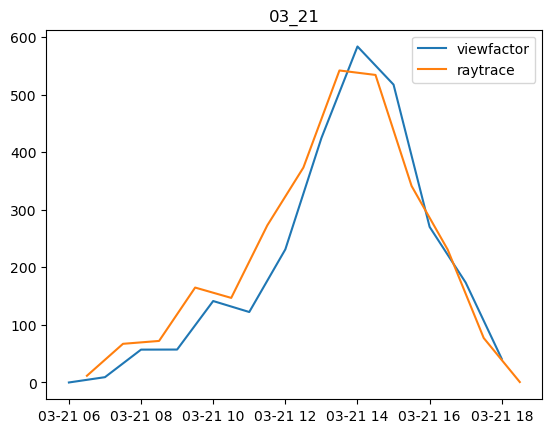

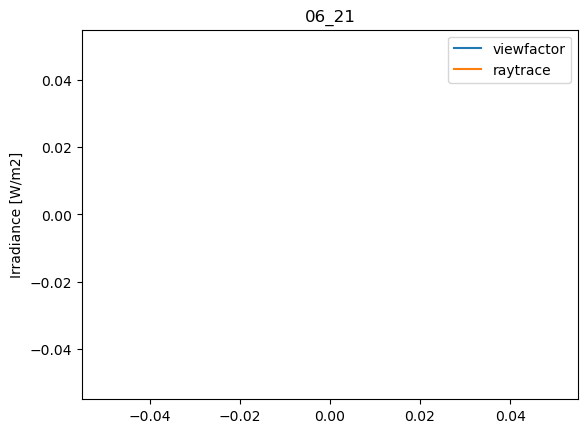

In [150]:
xyz = results[results.index <= '2021-03-22']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
#plt.plot(xyz['GTIFrontavg'], label='viewfactor Front')
plt.plot(xyz.index+pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('03_21')
plt.figure()
xyz = results[results.index >= '2021-06-20']
plt.plot(xyz['GTIBackavg'], label='viewfactor')
plt.plot(xyz.index+pd.Timedelta('30Min'), xyz['RearirradAVG'], label='raytrace')
plt.legend()
plt.title('06_21')
plt.ylabel('Irradiance [W/m2]')